<a href="https://colab.research.google.com/github/bnehirartan/DeepLearning_Atolye_ImageStylization/blob/main/DeepL_Atolye_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Stil Transferi
Bu notebookta TF Hub üzerinden stil transferi modeli kullanılarak Ghibli stili gibi stillerin görsellere aktarılması uygulaması yapılmıştır.

### Kütüphanelerin yüklenmesi

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
from PIL import Image
import numpy as np

###Modelin yüklenmesi ve fonksiyonların tanımlanması

In [ ]:
model=hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")



In [ ]:
def load_image(img_path,max_dim):
  img=Image.open(img_path).convert("RGB")
  img.thumbnail((max_dim,max_dim))
  arr=np.array(img)/255.0
  return tf.expand_dims(arr.astype(np.float32), axis=0)

In [ ]:
def stylize(content_path, style_path, content_max= 512, style_max=256): #always check the documentation
  content=load_image(content_path, content_max)
  style=load_image(style_path, style_max)
  output=model(tf.constant(content), tf.constant(style))
  stylized= output[0][0].numpy()
  stylized= (255*stylized).clip(0,255).astype(np.uint8)
  return Image.fromarray(stylized)

###Dosyaların yüklenmesi

In [ ]:
from google.colab import files

print("İçerik dosyasını yükleyin: ")
uploaded = files.upload()
content_path = list(uploaded.keys())[0]



İçerik dosyasını yükleyin: 


Saving görsell.jpg to görsell.jpg


In [ ]:
print("Stil dosyasını yükleyin: ")
uploaded = files.upload()
style_path = list(uploaded.keys())[0]


Stil dosyasını yükleyin: 


Saving stilll.JPG to stilll.JPG


### Stil transferinin yapılması

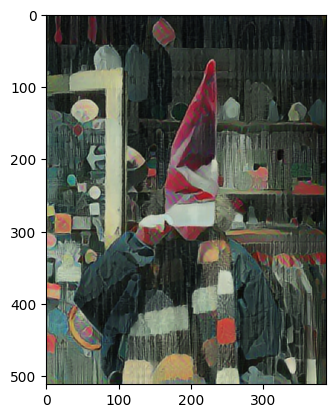

In [ ]:
import matplotlib.pyplot as plt
result=stylize(content_path, style_path)
plt.imshow(result)

###Dosyayı kaydet ve indir

In [ ]:
result.save("result.jpg")
files.download ("result.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>